<a href="https://colab.research.google.com/github/Dev523d/Election-data-Visualization/blob/main/Devendra_parihar_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment No.-->3

Experiment name -->create diffrent bar plots for variable in any dataset.

Name-->Devendra Parihar

Team Name-->Slytherin

github-->

DataSet url--> uploaded on github(Self Created)

In [ ]:
# importing the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# uploading the dataset
from google.colab import files
files.upload()

Saving voters data.csv to voters data.csv


{'voters data.csv': b'STATE NAME,Category,MALE,FEMALE,THIRD GENDER,TOTAL VOTES,NOTA VOTES,NON-NOTA VOTES\r\nRajasthan,GEN,12368311,11272136,78,23815191,220014,23567823\r\n,OBC,13568378,16554436,156,30122970,876314,29246656\r\n,SC,2551629,2121029,23,4701686,42010,4654194\r\n,ST,2000317,1941999,4,3959604,65535,3891488\r\n'}

In [ ]:
# import dataset to Pandas Data Frame
dataset = pd.read_csv('voters data.csv') 
#storing the data frame to the variable 'Dataset'
dataset = pd.DataFrame(dataset)

In [ ]:
dataset

,STATE NAME,Category,MALE,FEMALE,THIRD GENDER,TOTAL VOTES,NOTA VOTES,NON-NOTA VOTES
0,Rajasthan,GEN,12368311,11272136,78,23815191,220014,23567823
1,NaN,OBC,13568378,16554436,156,30122970,876314,29246656
2,NaN,SC,2551629,2121029,23,4701686,42010,4654194
3,NaN,ST,2000317,1941999,4,3959604,65535,3891488


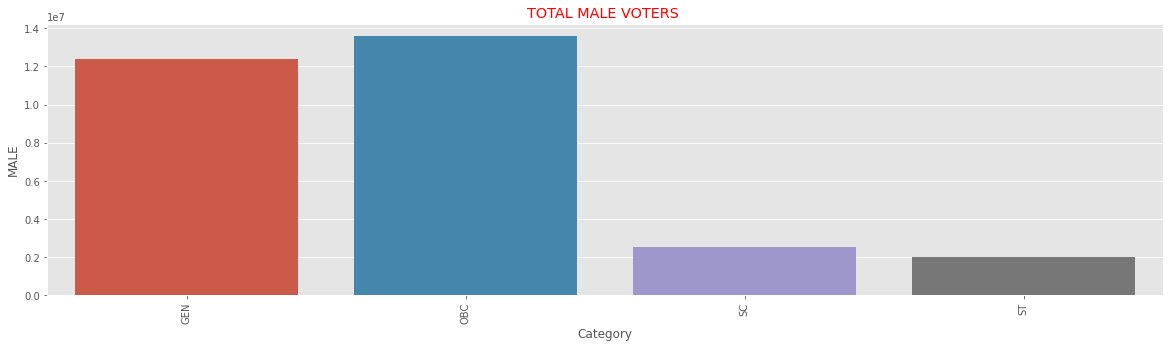

In [ ]:
#BAR PLOT for analisis about Total male voters from diffrent-diffrent categories
plt.figure(figsize = (20,5))
sns.barplot(x='Category', y= 'MALE', data = dataset)
plt.xticks(rotation = 90)
plt.title('TOTAL MALE VOTERS ',color='red')
plt.show()

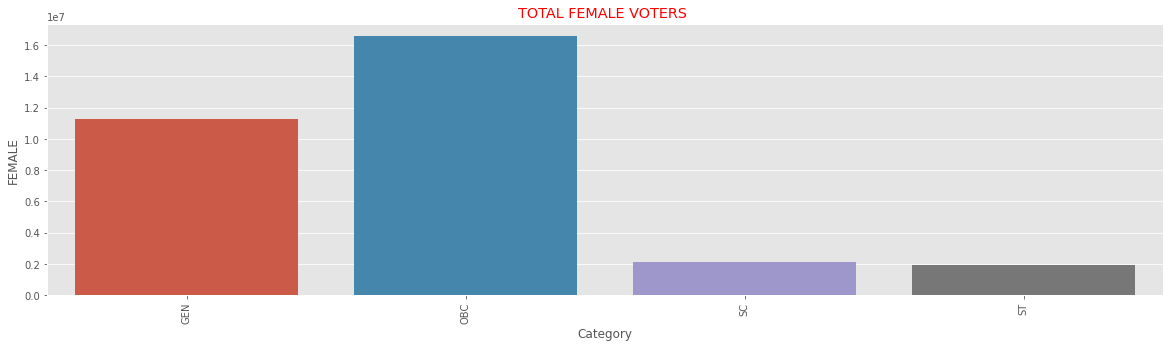

In [ ]:
#BAR PLOT for analisis about Total Female voters from diffrent-diffrent categories
plt.figure(figsize = (20,5))
sns.barplot(x='Category', y= 'FEMALE', data = dataset)
plt.xticks(rotation = 90)
plt.title('TOTAL FEMALE VOTERS ',color='red')
plt.show()

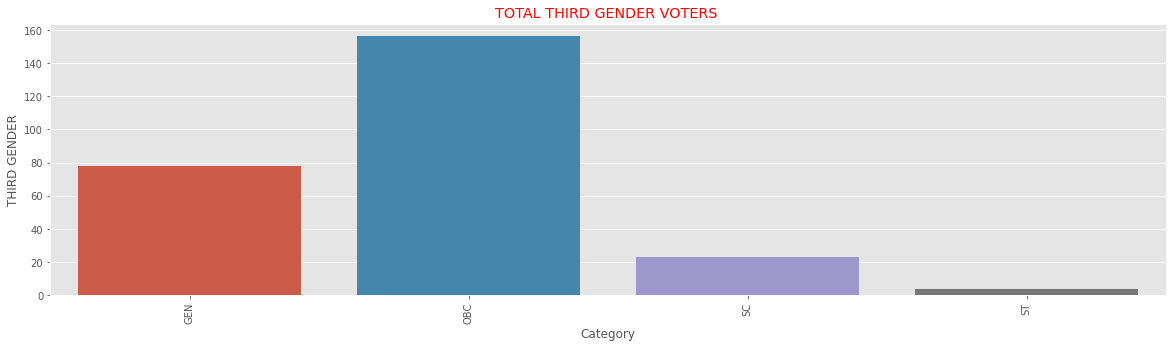

In [ ]:
#BAR PLOT for analisis about Total THIRD GENDER voters from diffrent-diffrent categories
plt.figure(figsize = (20,5))
sns.barplot(x='Category', y= 'THIRD GENDER', data = dataset)
plt.xticks(rotation = 90)
plt.title('TOTAL THIRD GENDER VOTERS ',color='red')
plt.show()

Text(0.5, 1.0, 'Total Votes from All Categories')

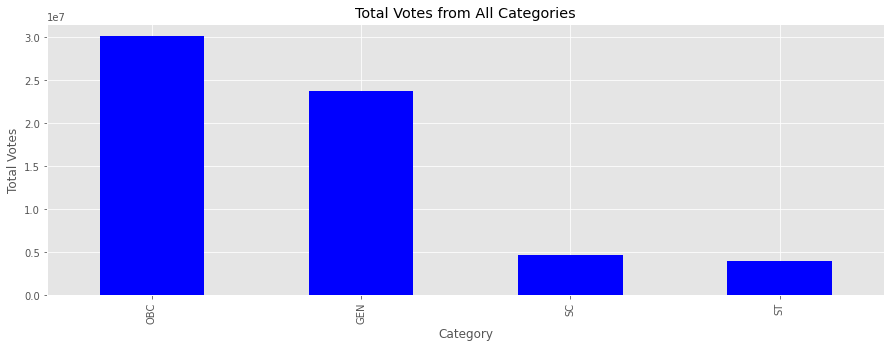

In [ ]:
#Bar plot for Analysis about total votes from diffrents-diffrents categories
plt.figure(figsize=(15,5))
dataset.groupby(['Category'])['TOTAL VOTES'].sum().sort_values(ascending=False).head(12).plot(kind='bar', color = 'b')
plt.ylabel('Total Votes')
plt.title('Total Votes from All Categories')

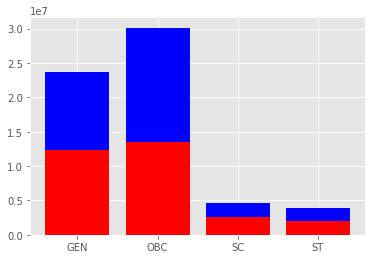

In [ ]:
#Bar plot for Male & Feamle Voters
x=dataset['Category']
y1=dataset['MALE']
y2=dataset['FEMALE']           
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

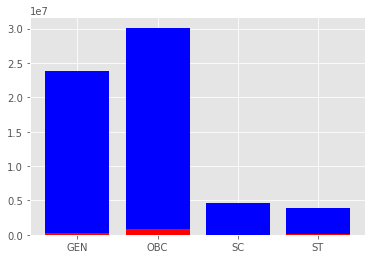

In [ ]:
#Bar plot for Male & Feamle Voters
x=dataset['Category']
y1=dataset['NOTA VOTES']
y2=dataset['NON-NOTA VOTES']           
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

In [ ]:
dataset

,STATE NAME,Category,MALE,FEMALE,THIRD GENDER,TOTAL VOTES,NOTA VOTES,NON-NOTA VOTES
0,Rajasthan,GEN,12368311,11272136,78,23815191,220014,23567823
1,NaN,OBC,13568378,16554436,156,30122970,876314,29246656
2,NaN,SC,2551629,2121029,23,4701686,42010,4654194
3,NaN,ST,2000317,1941999,4,3959604,65535,3891488


In [ ]:
new_dataset=dataset.drop(['TOTAL VOTES'],axis=1)
new_dataset=new_dataset.drop(['STATE NAME'],axis=1)
new_dataset

,Category,MALE,FEMALE,THIRD GENDER,NOTA VOTES,NON-NOTA VOTES
0,GEN,12368311,11272136,78,220014,23567823
1,OBC,13568378,16554436,156,876314,29246656
2,SC,2551629,2121029,23,42010,4654194
3,ST,2000317,1941999,4,65535,3891488


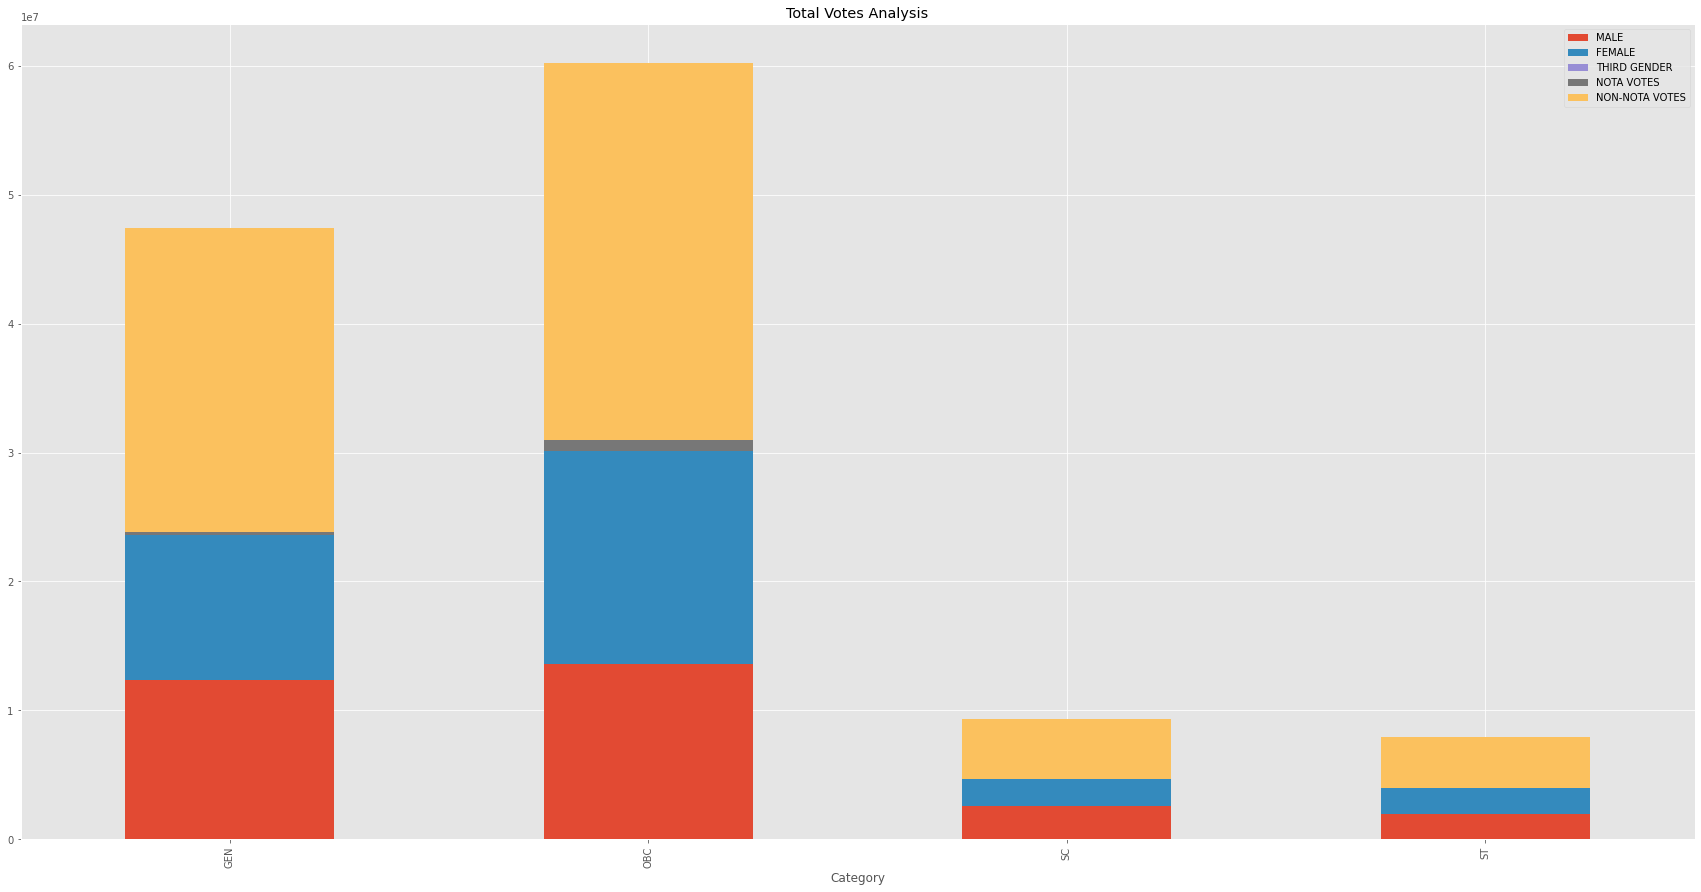

In [ ]:
new_dataset.plot(x='Category', kind='bar', stacked=True,
        title='Total Votes Analysis',figsize=(30,15))

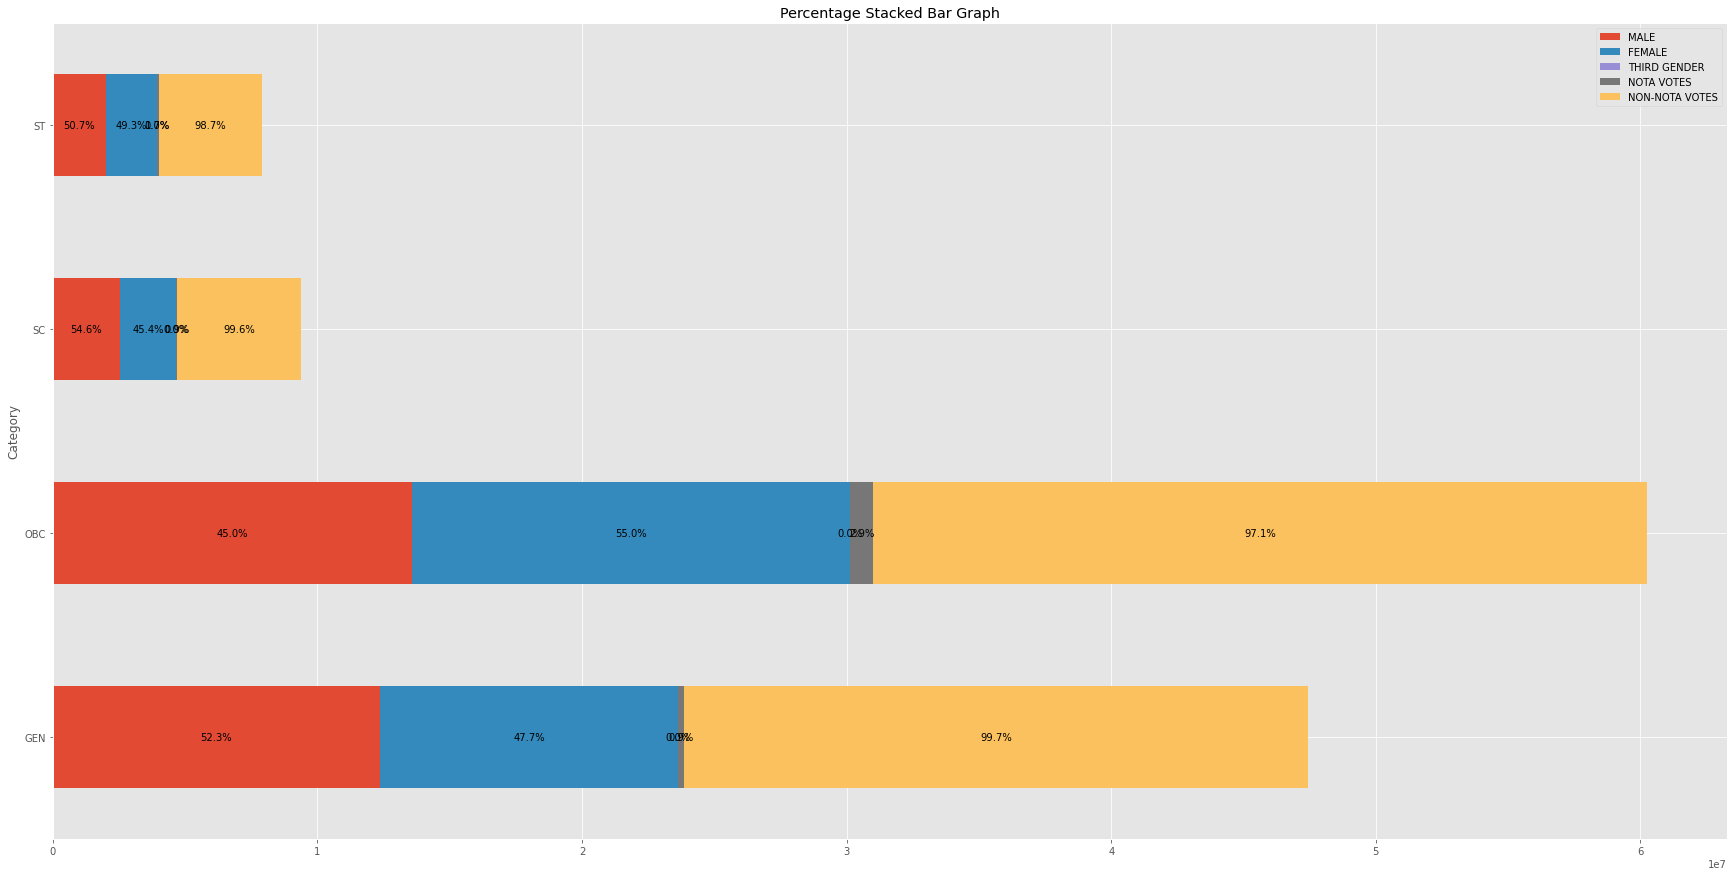

In [ ]:
# plot a Stacked Bar Chart using matplotlib
new_dataset.plot(
  x = 'Category', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True,
  figsize=(30,15))

df_total = new_dataset["MALE"] + new_dataset["FEMALE"] + new_dataset["THIRD GENDER"]
df_rel = new_dataset[new_dataset.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(new_dataset.iloc[:, 1:].cumsum(1)[n], 
                                         new_dataset[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')